In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import norm

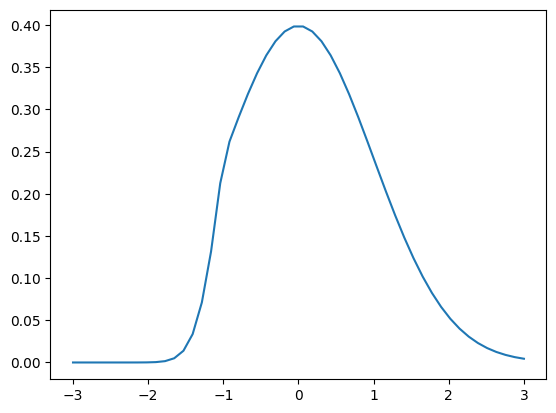

In [21]:
x = np.linspace(-3,3)
def a(x,b=-1):
    return np.where(x<b, (x-b)*3+b, (x-b)+b)
f = norm.pdf(a(x))
plt.plot(x,f)

In [26]:
from finko import data
univ = data.get(":osebx",verbose=True,min_data=4000)

[##########] 100% - load complete!


In [51]:
univ=univ.subset([t for t in univ.tickers if t!="PGS"])

In [80]:
univ_=univ.subset([univ.tickers[i] for i in range(len(univ.tickers)) if i not in [17]])

In [88]:
# How many stocks have 3 digit returns per year?
import pandas as pd
for s in univ_:
    s["Date."] = s["Date"].dt.date
dS = univ_.feature_matrix("dS","Date")
dS.fillna(0,inplace=True)
# cols = ["Date."]
# for t in univ.tickers:
#     if not pd.isna(dS.loc[4077, t]): cols.append(t)
# dS = dS[cols]
dS.sort_values(by="Date",inplace=True)
dS

,Date,ABG,AKAST,AKER,AKRBP,AKVA,AMSC,ABTEC,AZT,AFK,...,SVEG,SPOG,STB,STRO,SUBC,TECH,TEL,TOM,WWI,YAR
4037,2009-01-06 23:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4038,2009-01-07 23:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.051293,-0.076633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,2009-01-08 23:00:00+00:00,0.033152,-0.020317,0.016529,0.000000,0.000000,0.000000,0.000000,0.053110,0.000000,...,-0.025318,0.000000,0.000000,0.021979,-0.058739,0.056441,0.035347,0.022728,0.002751,-0.014052
1,2009-01-11 23:00:00+00:00,0.032088,-0.059912,-0.057351,0.025679,0.000000,0.000000,0.000000,-0.044060,-0.117783,...,0.000000,0.008811,-0.019545,0.007220,-0.077673,-0.024693,-0.030070,-0.011300,0.008208,-0.056603
2,2009-01-12 23:00:00+00:00,0.020834,0.022742,0.015504,0.054808,-0.054067,0.000000,-0.318454,0.044060,0.000000,...,0.000000,0.051293,-0.047147,0.146930,-0.022036,0.060625,0.031091,0.000000,0.018894,0.004979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,2025-01-28 23:00:00+00:00,0.005764,-0.008451,0.000000,-0.002516,-0.005970,0.011410,0.086432,0.000000,-0.001467,...,0.008186,0.017772,0.006775,-0.004728,-0.017568,0.029632,0.012386,-0.010734,0.004926,0.001181
4033,2025-01-29 23:00:00+00:00,0.000000,-0.002833,0.003333,-0.004207,-0.036589,0.003236,0.000000,0.025071,0.001467,...,0.002036,0.012121,0.003744,-0.014320,0.006957,0.021662,0.005056,0.004188,0.008563,0.017839
4034,2025-01-30 23:00:00+00:00,0.001436,-0.022957,0.011580,-0.002110,-0.031548,0.001614,0.031350,0.001375,-0.020741,...,-0.011730,0.037958,-0.002245,0.028438,-0.001067,-0.003578,-0.002886,0.001193,0.003647,-0.017544
4035,2025-02-02 23:00:00+00:00,-0.005755,-0.047557,-0.016584,-0.002538,0.006390,0.000000,-0.047402,-0.005510,-0.009023,...,-0.011869,0.011915,-0.008274,0.004662,-0.017233,-0.032790,-0.001446,-0.008985,-0.017136,-0.015458


In [125]:
import numpy as np
dS["Year"]=dS["Date"].dt.year
lr = dS.drop(columns="Date").groupby("Year").sum()
vol = dS.drop(columns="Date").groupby("Year").std()*255
sharpe = lr*100/vol

prc = np.exp(lr)*100-100
num_exceed = np.sum(prc > 100,axis=1)
vol = np.std(prc > 100,axis=1)
# num_exceed
mean_sharpe = np.mean(sharpe, axis=1)
mean_sharpe

Year
2009    3.683986
2010    1.519141
2011   -4.231122
2012    1.454195
2013    4.763495
2014    0.251380
2015    0.297597
2016    2.553934
2017    2.274838
2018   -1.134638
2019    3.324434
2020    1.416424
2021    3.507176
2022   -0.920652
2023    1.086670
2024    1.452889
2025    0.825643
dtype: float64

Text(0.5, 0, 'Year (Jan 1 - Dec 31)')

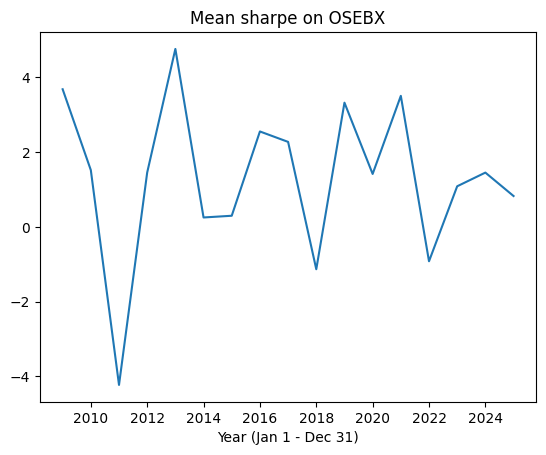

In [129]:
from matplotlib import pyplot as plt
plt.title("Mean sharpe on OSEBX")
plt.plot(mean_sharpe,label="Sharpe")
# plt.plot(vol*20,label="Volatility")
# plt.legend()
plt.xlabel("Year (Jan 1 - Dec 31)")
# plt.yticks([])

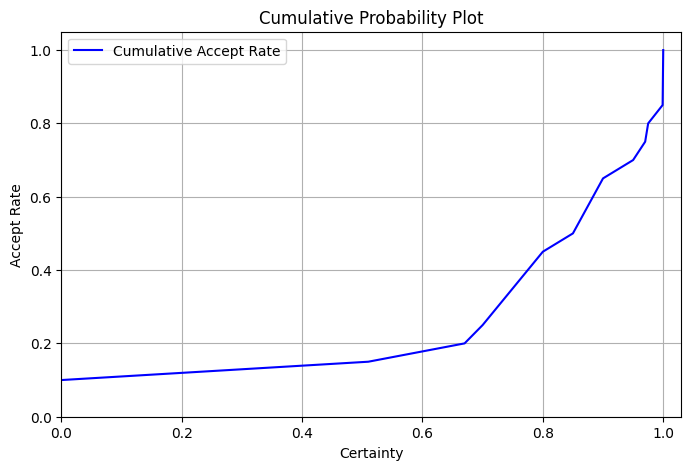

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Given responses
responses = np.array([
    0.97, 0.975, 0.80, 0.7, 1, 0, 0.8, 0.8, 0.9, 0.8, 1, 1, 0.67, 0.999, 0.51, 0.95, 0,
    0.85, 0.9,
    # ChatGPT:
    0.9
    # 0.9, 0.6, 0.5, 0.9
])

# Sort responses in ascending order
responses_sorted = np.sort(responses)

# Compute accept rate (fraction of responses greater than or equal to a given certainty level)
x_vals = np.unique(responses_sorted)
# Compute accept rate correctly (fraction of responses less than or equal to a given certainty level)
y_vals = [(responses_sorted <= x).mean() for x in x_vals]

# Plot cumulative probability curve without dots
plt.figure(figsize=(8, 5))
plt.ylim(0, 1.05)
plt.xlim(0, 1.03)
plt.plot(x_vals, y_vals, linestyle="-", color="b", label="Cumulative Accept Rate")
plt.xlabel("Certainty")
plt.ylabel("Accept Rate")
plt.title("Cumulative Probability Plot")
plt.grid(True)
plt.legend()
plt.show()


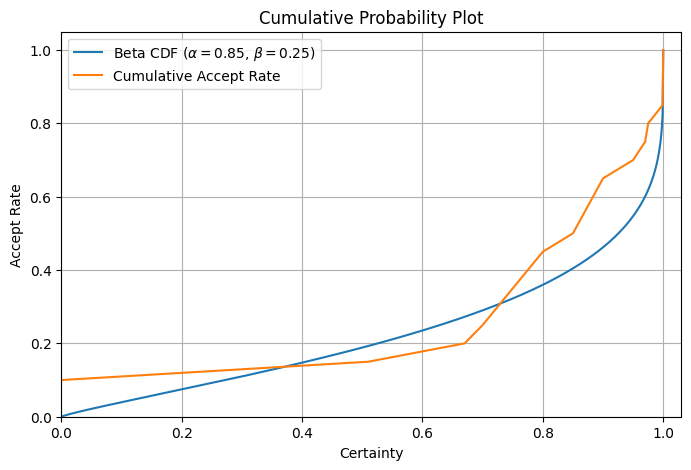

In [27]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate alpha and beta for the Beta distribution
def estimate_beta_params(data):
    mean = np.mean(data)
    variance = np.var(data)
    
    # Calculate alpha and beta using method of moments
    alpha = ((1 - mean) / variance - 1 / mean) * mean**2
    beta_param = alpha * (1 / mean - 1)
    
    return alpha, beta_param

# Function to plot CDF of Beta distribution with estimated parameters
def plot_beta_cdf(alpha, beta_param):
    x = np.linspace(0, 1, 1000)
    y = beta.cdf(x, alpha, beta_param)
    
    # Plot the CDF
    plt.plot(x, y, label=f"Beta CDF ($\\alpha={alpha:.2f}$, $\\beta={beta_param:.2f}$)")
# Estimate alpha and beta for the given data
alpha, beta_param = estimate_beta_params(responses)

# Plot the CDF of the estimated Beta distribution

plt.figure(figsize=(8, 5))
plot_beta_cdf(alpha, beta_param)

plt.ylim(0, 1.05)
plt.xlim(0, 1.03)
plt.plot(x_vals, y_vals, linestyle="-", label="Cumulative Accept Rate")
plt.xlabel("Certainty")
plt.ylabel("Accept Rate")
plt.title("Cumulative Probability Plot")
plt.grid(True)
plt.legend()
plt.show()
